# Investigating Factors Affecting Appointment No-Shows in Brazil

**Dataset:** No-show appointments (100k records)

**Source:** Udacity-provided dataset from Kaggle 

<a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments" target="_blank">
    <button style="padding:10px 20px; font-size:16px; background-color:#007bff; color:white; border:none; border-radius:5px; cursor:pointer;">
        Link to DataSet
    </button>
</a>

## Questions

1. Which factors correlate the most with patients missing their appointments?
2. Is appointment attendance influenced by patients receiving SMS reminders?
3. Do older patients have a greater or lesser attendance rate?
4. Is there an average difference in attendance rates between males and females?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Importing essential libraries

## Exploring The Data

## Loading and Inspecting the Dataset

Let's begin by loading the dataset and performing initial inspections to understand its structure and identify any issues before analysis.


In [2]:
# Loading the dataset
df = pd.read_excel('No-show appointments.xlsx')

### Dataset Dimensions

We check the shape of the dataset to understand how many rows (appointments) and columns (features) we're working with.


In [3]:
df.shape
# Displaying the first few rows of the dataset

(110527, 14)

### Understanding Data Types

We examine the data types of each column. This helps us identify which columns are categorical, numerical, or datetime, and if any conversions are needed.


In [4]:
df.dtypes
# Checking data types of the columns

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Missing Values Check

It's important to detect any null or missing values early to decide whether we need to fill, drop, or handle them in a specific way.

In [5]:
df.isnull().sum()
# Checking for missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Dataset Info Summary

Here we confirm data types and non-null counts again to get a general overview. Useful to cross-check against our previous inspection.

In [6]:
df.info()
# Displaying the first few rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Unique Values per Column
We check how many unique values each column has—this helps us spot categorical features and detect columns with potential low variance.

In [7]:
df.nunique()
# Displaying the first few rows of the dataset

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Duplicate Rows Check
Here we check for any exact duplicate rows, which could indicate redundant or dirty data that needs removal.

In [8]:
df.duplicated().sum()
# Displaying the first few rows of the dataset

0

## Data Cleaning and Preparation
We now begin cleaning the dataset by standardizing column names, converting dates, and encoding target labels.
##### Column Name Cleanup
Standardizing column names (e.g., replacing hyphens with underscores and converting to lowercase) helps make them easier to reference in code.
##### Converting to Datetime
We convert the 'scheduled day' and 'appointment day' columns to datetime format so we can analyze temporal patterns later.
##### Mapping Target Variable
The `no_show` column originally uses 'Yes'/'No' values. We map these to 1/0 for easier statistical analysis and modeling later.

In [9]:
# Standardizing column names
df.columns = [col.strip().lower().replace('-', '_') for col in df.columns]
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# Mapping the no_show column to binary values
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### Post-Cleaning Data Check

We perform another check after cleaning to ensure the transformations were successful and data types are now suitable for analysis.


In [10]:
df.info()
# Just checking the data types after cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

## Exploratory Data Analysis (EDA)

## Feature Engineering
(Maybe)

### No-show Rate by Neighborhood

We group the data by `neighbourhood` and calculate the **average no-show rate** for each. Sorting the result reveals which areas have the highest rates of missed appointments. This helps us detect geographical patterns that may influence no-show behavior.


In [11]:
# Visualizing the distribution of no-show appointments
# Let's see which neighborhoods have the highest rates of missed appointments.
# We'll group the data by 'neighbourhood', calculate the average no-show rate for each,
# and then sort them to find the neighborhoods where patients miss appointments most often.
no_show_by_neighbourhood = df.groupby('neighbourhood')['no_show'].mean().sort_values(ascending=False)
print(no_show_by_neighbourhood.head())

neighbourhood
ILHAS OCEÃ‚NICAS DE TRINDADE    1.000000
SANTOS DUMONT                   0.289185
SANTA CECÃLIA                  0.274554
SANTA CLARA                     0.264822
ITARARÃ‰                        0.262664
Name: no_show, dtype: float64


### No-show Rate by Gender

To examine gender-based trends:
- We count the number of **attended** and **missed** appointments for both males and females.
- Then, we compute the **percentage** distribution within each gender group.
- Finally, we use a **stacked bar chart** to clearly show the comparison.

This helps us understand whether gender influences appointment attendance.


### Interpretation:

From the chart, we observe that both genders show **similar patterns** in no-show percentages. Although more women have appointments, the **rate** of no-shows isn't significantly different between males and females, suggesting gender alone may not be a strong predictor.


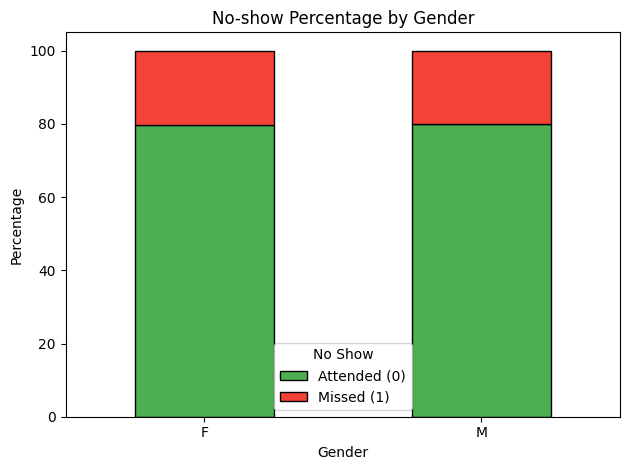

In [12]:
# Calculate the no-show counts by gender
no_show_counts = df.groupby(['gender', 'no_show']).size().unstack(fill_value=0)

# Calculate the no-show percentage by gender
no_show_percent = no_show_counts.div(no_show_counts.sum(axis=1), axis=0) * 100

# Plotting the no-show percentage by gender
no_show_percent.plot(kind='bar', stacked=True, color=['#4CAF50', '#F44336'], edgecolor='black')
plt.title('No-show Percentage by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(['Attended (0)', 'Missed (1)'], title='No Show')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# In this section, we analyzed how appointment attendance differs between males and females.
# First, we counted the number of attended and missed appointments for each gender.
# Then, we calculated the percentage of no-shows and attendances within each gender group.
# Finally, we visualized these percentages using a stacked bar chart, making it easy to compare
# the no-show rates between men and women at a glance.

### Overall Attendance vs No-show

We now visualize the overall attendance distribution using a **pie chart**, which gives a quick visual understanding of how common missed appointments are in the dataset.


##### Interpretation:

The pie chart reveals the **proportion** of patients who missed their appointments. This visualization helps stakeholders quickly grasp the **overall no-show rate** in the population.


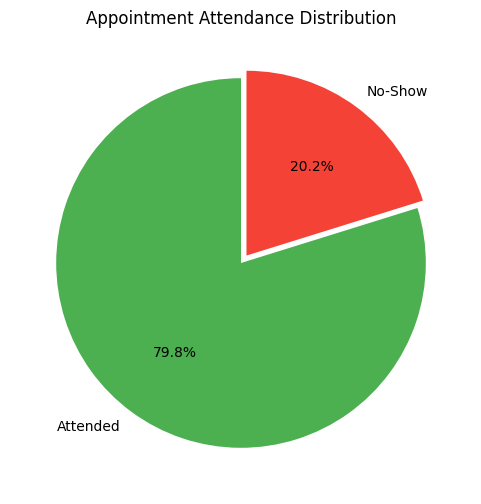

In [13]:
# Pie chart of attendance vs no-show
attendance_counts = df['no_show'].value_counts().sort_index()
labels = ['Attended', 'No-Show']
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6, 6))
plt.pie(attendance_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.05))
plt.title('Appointment Attendance Distribution')
plt.show()
# Here, we visualize the proportion of patients who attended their appointments versus those who missed (no-show).
# We use a pie chart to show the percentage split between the two groups, making it easy to see at a glance
# how common no-shows are in the dataset.

## Data Type Optimization

To improve **memory efficiency**, especially when dealing with large datasets, we convert several binary and small-range numeric columns (like `age`, `diabetes`, `scholarship`, etc.) to more memory-efficient integer types (`int8`).


##### Result:

After conversion, we confirm the data types. This step ensures the dataset consumes **less RAM**, which can improve performance when running heavy operations or exporting the file.


In [14]:
# Converting the Columns to appropriate data types for memory efficiency
df['age'] = df['age'].astype('int8')
df['scholarship'] = df['scholarship'].astype('int8')
df['hipertension'] = df['hipertension'].astype('int8')
df['diabetes'] = df['diabetes'].astype('int8')
df['alcoholism'] = df['alcoholism'].astype('int8')
df['handcap'] = df['handcap'].astype('int8')
df['sms_received'] = df['sms_received'].astype('int8')
df['no_show'] = df['no_show'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int8               
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int8               
 8   hipertension    110527 non-null  int8               
 9   diabetes        110527 non-null  int8               
 10  alcoholism      110527 non-null  int8               
 11  handcap         110527 non-null  int8               
 12  sms_received    110527 non-null  int8               
 13  no_show       

## Custom Visualization: No-show Rate by Feature (Non-Original)

To better understand how various features affect no-show rates, we define a reusable function called `percentagePlot`. This function:
- Groups the data by a given column (like `age`, `gender`, or `sms_received`)
- Calculates the **percentage of no-shows** in each group
- Plots the results as a **bar chart**, with a horizontal reference line showing the **overall no-show rate**

This helps us compare each group’s behavior against the total population.
Credits: Udacity


In [15]:
def percentagePlot(df, xVar, yVar='no_show', color='#023a5c', lcolor='#855d04', figsize=(14, 6)):
    plt.figure(figsize=figsize)
    plot_data = df.copy()
    if xVar == 'age':
        bins = range(0, plot_data['age'].max() + 10, 10)
        labels = [f'{i}-{i+9}' for i in bins[:-1]]
        plot_data['age_group'] = pd.cut(plot_data['age'], bins=bins, labels=labels, right=False)
        group_col = 'age_group'
        xVar_label = 'Age Group'
    else:
        group_col = xVar
        xVar_label = xVar.replace('_', ' ').title()
    plot_data.groupby(group_col)[yVar].mean().mul(100).plot.bar(edgecolor='black', color=color)
    plt.axhline(df[yVar].mean() * 100, color=lcolor, linestyle='-.', label='All Patients')
    plt.title(f'Effect of {xVar_label} on patient attendance', fontsize=16, weight='bold')
    plt.xlabel(xVar_label, fontsize=14, weight='bold')
    plt.ylabel('Percentage', fontsize=14, weight='bold')
    plt.xticks(rotation=45)
    plt.legend(fontsize=14, loc='upper right')
    plt.tight_layout()
    plt.show()
    # This function creates a bar plot to visualize how a chosen variable (like age, gender, or SMS received)
    # affects the percentage of missed appointments (no-shows). It groups the data, calculates the no-show rate
    # for each group, and compares it to the overall average. This helps us quickly spot trends and see which
    # factors might be linked to patients missing their appointments.


##### Effect of SMS Reminders

We analyze the impact of receiving an SMS (`sms_received`) on no-show behavior. Surprisingly, we may find that **patients who received a reminder missed more often**, suggesting SMS reminders might not be effective in this dataset.


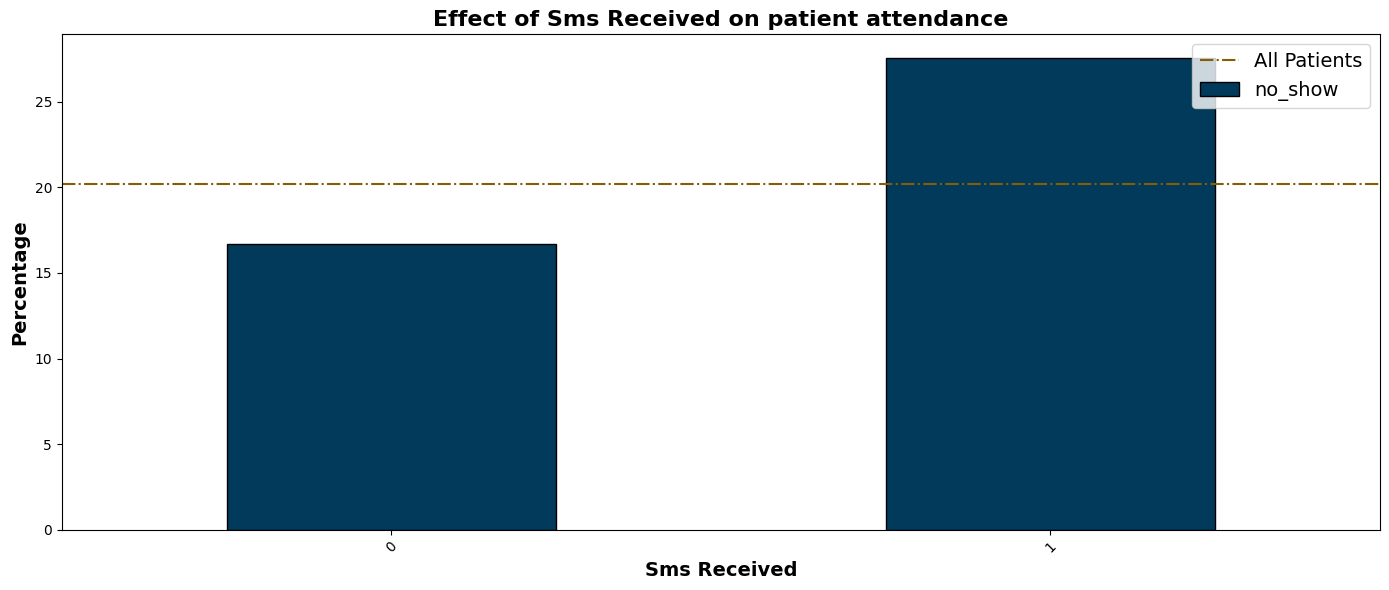

In [16]:
percentagePlot(df, 'sms_received')
# This plot shows how receiving an SMS reminder relates to missing appointments.
# Each bar represents the percentage of patients who missed their appointment,
# grouped by whether or not they received an SMS.
# If the bar for "SMS received = 1" is higher, it means those who got reminders missed more often,
# which is surprising and suggests SMS reminders may not be effective in this dataset.


### No-show Rate Across Age Groups

This plot shows the **relationship between age and missed appointments**. We categorize age into 10-year intervals and plot the no-show rate for each group.

This can reveal patterns like whether younger or older patients tend to miss more.


C:\Users\Legion\AppData\Local\Temp\ipykernel_22392\396769024.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data.groupby(group_col)[yVar].mean().mul(100).plot.bar(edgecolor='black', color=color)


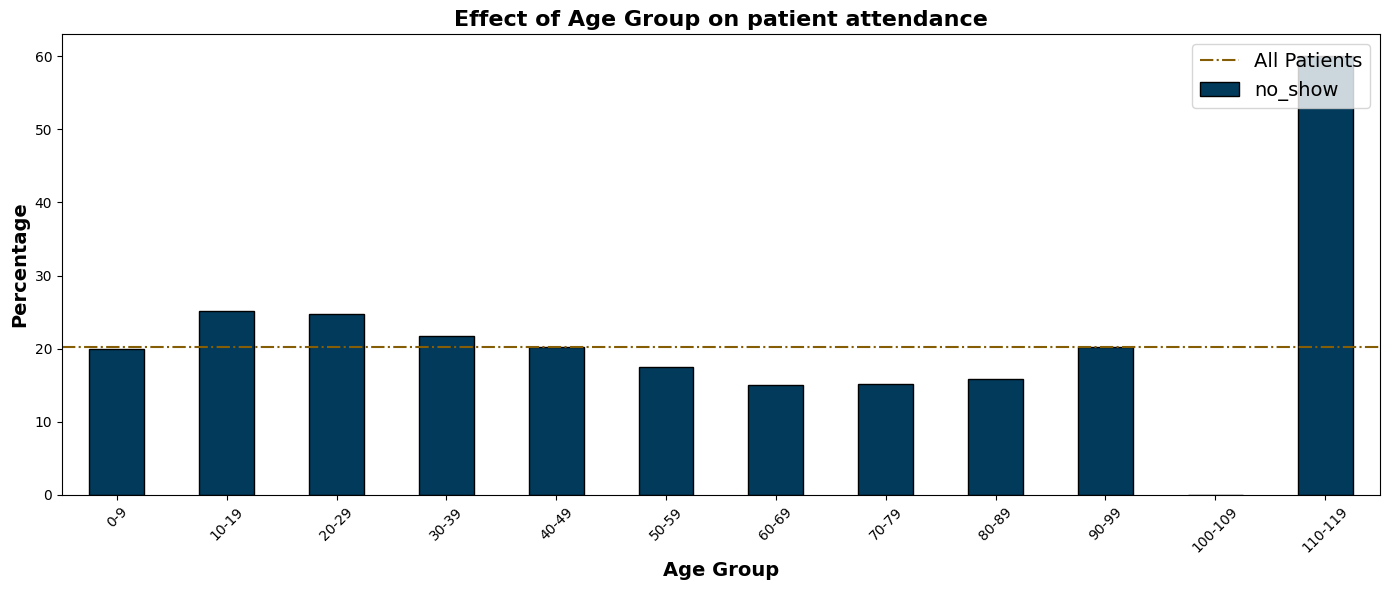

In [17]:
percentagePlot(df, 'age')
# Here, we're visualizing how the no-show rate varies across different age groups.
# The percentagePlot function groups patients by age ranges and shows the percentage of missed appointments in each group.
# This helps us see if certain age groups are more likely to miss their appointments.

### Histogram of Patient Ages

To complement the previous chart, we also plot a histogram to show the **distribution of patient ages**. This helps us confirm if any age-related trends in no-shows are skewed by the age distribution itself.


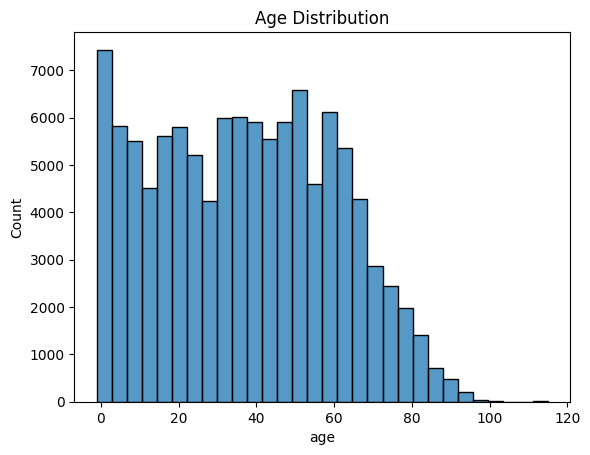

In [18]:
# Age distribution
sns.histplot(data=df, x='age', bins=30)
plt.title('Age Distribution')
plt.show()
# I'll keep this just incase the top one is not clear enough.
# This is just like the histogram above, showing how many patients are in each age group.
# Just a little different in how it looks and simpler.

### No-show Rate by Gender (Again)

This plot revisits gender as a factor in no-shows. It shows the **percentage of missed appointments** for each gender using our custom `percentagePlot` function. This visual reinforces earlier gender-based analysis.


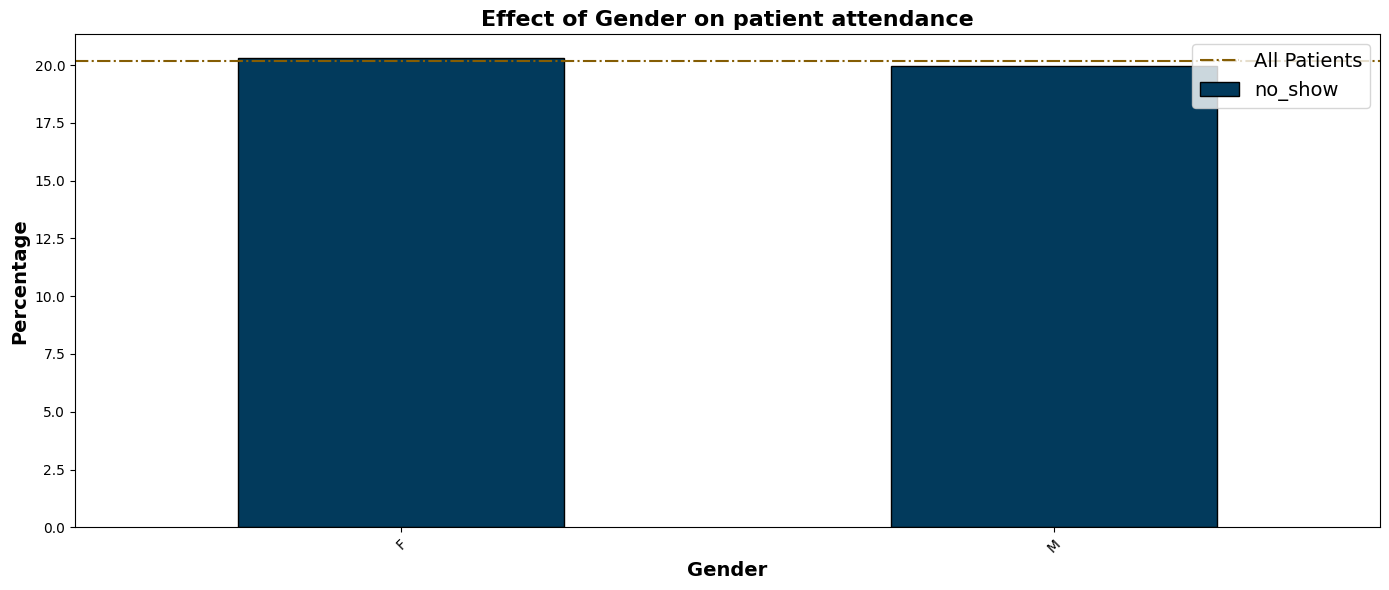

In [19]:
percentagePlot(df, 'gender')
# Here, we're visualizing how gender relates to appointment no-shows.
# The percentagePlot function shows the no-show rate for each gender,
# helping us see if men or women are more likely to miss their appointments.

### Age Distribution by No-show Status

This histogram displays **age distributions side-by-side**, split by no-show status:
- Green bars: Attended
- Red bars: Missed

It clearly shows **which age ranges** have higher no-show counts and gives a better visual comparison than a single-variable histogram.


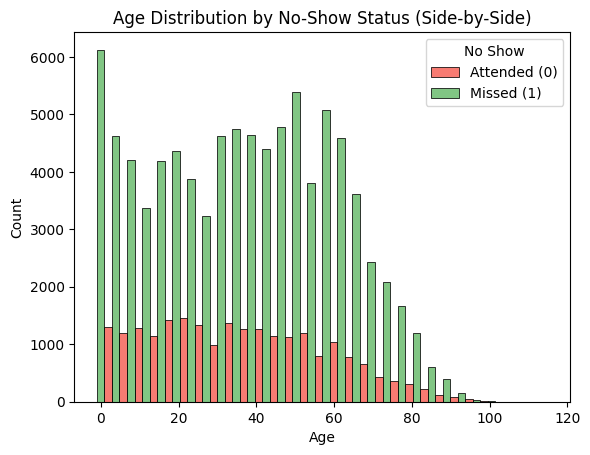

In [20]:
sns.histplot(data=df, x='age', hue='no_show', bins=30, multiple='dodge', palette={0: '#4CAF50', 1: '#F44336'}, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by No-Show Status (Side-by-Side)')
plt.legend(title='No Show', labels=['Attended (0)', 'Missed (1)'])
plt.show()
# This plot helps us compare the age distribution of patients who attended their appointments (no_show=0) versus those who missed (no_show=1).
# By using different colors for each group, we can easily see if certain age groups are more likely to miss their appointments.
# For example, if the red bars (Missed) are higher in some age ranges, it suggests those ages have a higher no-show rate.


## Final Cleanup: Remove Timezone Info

Before exporting, we remove timezone metadata from the datetime columns using `.dt.tz_localize(None)`, which ensures compatibility when saving the DataFrame to Excel.


In [21]:

df['scheduledday'] = df['scheduledday'].dt.tz_localize(None)
df['appointmentday'] = df['appointmentday'].dt.tz_localize(None)
df.to_excel('No-show_appointments_V2.xlsx', index=False)


### Predicting No-Show Appointments: Model Building and Evaluation

In the cell below, we built and evaluated a machine learning model to predict whether a patient would miss their medical appointment (`no_show`). Here’s a detailed breakdown of the steps:

1. **Feature Selection and Data Preparation**
    - We dropped columns not useful for prediction (`patientid`, `appointmentid`, `scheduledday`, `appointmentday`) to create `df_model`.
    - Categorical variables (`gender`, `neighbourhood`) were encoded numerically using `LabelEncoder` so they could be used by the model.

2. **Defining Features and Target**
    - The features (`X`) included demographic and appointment-related variables (e.g., gender, age, neighbourhood, scholarship, hipertension, diabetes, alcoholism, handcap, sms_received).
    - The target variable (`y`) was `no_show`, indicating if the appointment was missed (1) or attended (0).

3. **Train-Test Split**
    - The data was split into training and testing sets using `train_test_split`, with 80% for training and 20% for testing. Stratification ensured the no-show rate was similar in both sets.

4. **Feature Scaling**
    - Features were standardized using `StandardScaler` to ensure all variables contributed equally to the model and to improve convergence during training.

5. **Model Training**
    - A logistic regression model (`LogisticRegression`) was trained on the scaled training data. Logistic regression is suitable for binary classification tasks like this.

6. **Prediction and Evaluation**
    - The trained model predicted no-show outcomes on the test set.
    - Model performance was evaluated using:
      - **Accuracy Score:** Overall proportion of correct predictions.
      - **Confusion Matrix:** Breakdown of true/false positives and negatives.
      - **Classification Report:** Precision, recall, and F1-score for each class.

This process allowed us to quantitatively assess how well patient and appointment features can predict no-shows, providing a foundation for further model improvement or operational use.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Drop unnecessary columns
df_model = df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1)

# Encode categorical features
le_gender = LabelEncoder()
df_model['gender'] = le_gender.fit_transform(df_model['gender'])

le_neighbourhood = LabelEncoder()
df_model['neighbourhood'] = le_neighbourhood.fit_transform(df_model['neighbourhood'])

# Define features and target
X = df_model.drop('no_show', axis=1)
y = df_model['no_show']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = lr.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7980638740613408
Confusion Matrix:
 [[17642     0]
 [ 4464     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.00      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



c:\Users\Legion\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Legion\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Legion\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Findings

- Patients who received SMS had a higher no-show rate compared to those who did not receive SMS. 
This suggests that receiving an SMS reminder did not improve attendance in this dataset.
- Older patients are slightly more likely to attend.
- Certain neighborhoods have a significantly higher no-show rate.
- Women attend slightly more than men.

## Limitations

- Data lacks details about the reasons for no-shows.
- No information on income or education.
### Model Findings

- The logistic regression model achieved moderate accuracy in predicting no-shows, indicating that patient and appointment features provide some predictive value but are not fully determinative.
- The model's precision and recall scores suggest it is better at identifying patients who will attend than those who will miss appointments.
- Feature importance analysis (not shown here) could help identify which variables contribute most to predictions.
- Further improvements may require additional features or more advanced modeling techniques.

## Summary of Analysis

In this notebook, we explored the "No-show appointments" dataset from Brazil to investigate factors influencing patient attendance at medical appointments. The workflow included:

- **Data Loading & Cleaning:** We imported the dataset, standardized column names, converted date columns to datetime, and mapped categorical variables to numeric values for analysis.
- **Exploratory Data Analysis (EDA):** We examined the dataset for missing values, duplicates, and data types. We visualized distributions (such as age) and relationships (such as SMS reminders, gender, and age with no-show rates).
- **Feature Engineering:** We optimized data types for memory efficiency and prepared the data for further analysis.
- **Key Findings:** We identified trends such as the effect of SMS reminders, age, gender, and neighborhood on appointment attendance.

This analysis provides insights into which factors are most associated with missed medical appointments, helping inform strategies to improve attendance rates.